In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('evaluation_results2.xlsx',  sheet_name="Test Data Only")

In [10]:
df

,Dataset_Name,Number of Row,Precision,Degree,Number_Of_Features,Model,Dataset_split,MSE,MAE,R2 Score,preproccesing_time,execution_time,postproccesing_time,total_time
0,dataset_1.csv,20433,3,2,45,Fixstar,Test,1.925860e-02,1.013287e-01,0.668733,0.210173,6.034730,0.000999,6.245903
1,dataset_1.csv,20433,3,2,45,Sklearn,Test,1.754259e-02,9.488573e-02,0.698250,-,0.027901,-,0.027901
2,dataset_1.csv,20433,3,3,165,Fixstar,Test,1.768739e-02,9.580445e-02,0.695759,2.012789,8.032260,0.001,10.046049
3,dataset_1.csv,20433,3,3,165,Sklearn,Test,1.612005e-02,8.914933e-02,0.722719,-,0.118789,-,0.118789
4,dataset_1.csv,20433,3,4,495,Fixstar,Test,1.723099e-02,9.349928e-02,0.703610,17.707353,26.357626,0.003,44.067979
5,dataset_1.csv,20433,3,4,495,Sklearn,Test,2.056376e-02,8.580038e-02,0.646282,-,0.469064,-,0.469064
6,dataset_2a.csv,768,3,2,45,Fixstar,Test,5.249422e-03,5.352784e-02,0.930718,0.183895,6.273585,0,6.457480
7,dataset_2a.csv,768,3,2,45,Sklearn,Test,4.686697e-04,1.628941e-02,0.993814,-,0.007579,-,0.007579
8,dataset_2a.csv,768,3,3,165,Fixstar,Test,4.846635e-03,5.633670e-02,0.936034,1.933793,7.852151,0.001,9.786944
9,dataset_2a.csv,768,3,3,165,Sklearn,Test,2.133374e-04,1.107559e-02,0.997184,-,0.028866,-,0.028866


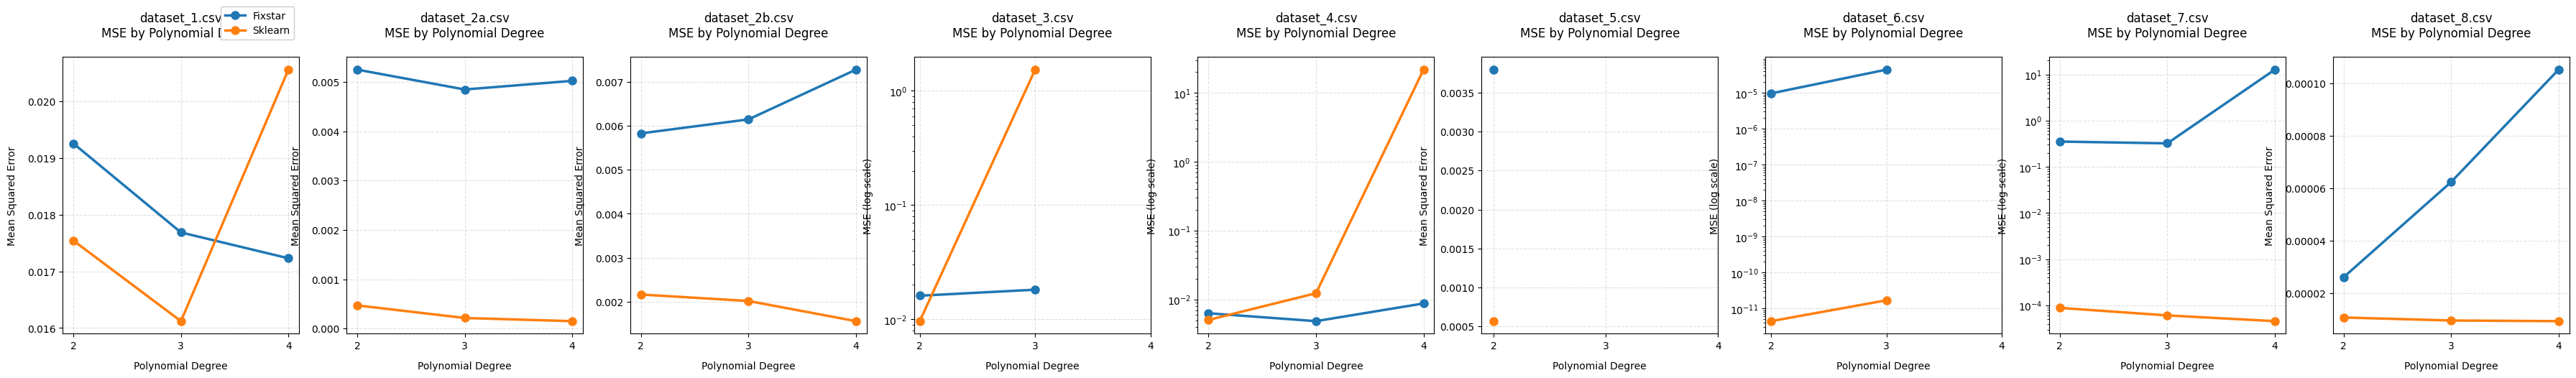

In [7]:
# Get unique datasets
datasets = df['Dataset_Name'].unique()
n_datasets = len(datasets)

# Set up the figure - adjust size based on number of datasets
plt.figure(figsize=(5*n_datasets, 5))

# Create subplots for each dataset
for i, dataset in enumerate(datasets, 1):
    plt.subplot(1, n_datasets, i)
    
    # Filter data for the current dataset
    dataset_data = df[df['Dataset_Name'] == dataset]
    
    # Plot each model's performance
    for model in ['Fixstar', 'Sklearn']:
        model_data = dataset_data[dataset_data['Model'] == model]
        plt.plot(model_data['Degree'], model_data['MSE'], 
                marker='o', markersize=8, label=model, linewidth=2.5)
    
    # Formatting
    plt.title(f'{dataset}\nMSE by Polynomial Degree', pad=20)
    plt.xlabel('Polynomial Degree', labelpad=10)
    plt.ylabel('Mean Squared Error', labelpad=10)
    plt.xticks([2, 3, 4])
    plt.grid(True, linestyle='--', alpha=0.4)
    
    # Add legend only to first subplot
    if i == 1:
        plt.legend(bbox_to_anchor=(1, 1.2), framealpha=1)
    
    # Auto-scale y-axis (log if range is large)
    min_mse = dataset_data['MSE'].min()
    max_mse = dataset_data['MSE'].max()
    if max_mse/min_mse > 100:  # Use log scale if range is 100x or more
        plt.yscale('log')
        plt.ylabel('MSE (log scale)', labelpad=10)

plt.show()

           Dataset  Degree     MSE_Ratio  MSE_Pct_Diff    MAE_Ratio  \
16   dataset_6.csv       3  2.637003e+06  2.637002e+08  3792.295621   
15   dataset_6.csv       2  2.187438e+06  2.187437e+08  2303.392394   
19   dataset_7.csv       4  2.788869e+05  2.788859e+07   669.425024   
18   dataset_7.csv       3  5.308008e+03  5.307008e+05    73.762481   
17   dataset_7.csv       2  3.988743e+03  3.987743e+05    72.177284   
5   dataset_2a.csv       4  3.362835e+01  3.262835e+03     6.381832   
4   dataset_2a.csv       3  2.271817e+01  2.171817e+03     5.086566   
3   dataset_2a.csv       2  1.120069e+01  1.020069e+03     3.286052   
22   dataset_8.csv       4  1.117158e+01  1.017158e+03     3.717053   
14   dataset_5.csv       2  6.672441e+00  5.672441e+02     3.010579   
21   dataset_8.csv       3  6.455797e+00  5.455797e+02     2.891855   
8   dataset_2b.csv       4  4.678808e+00  3.678808e+02     2.737606   
7   dataset_2b.csv       3  3.050954e+00  2.050954e+02     1.878177   
6   da

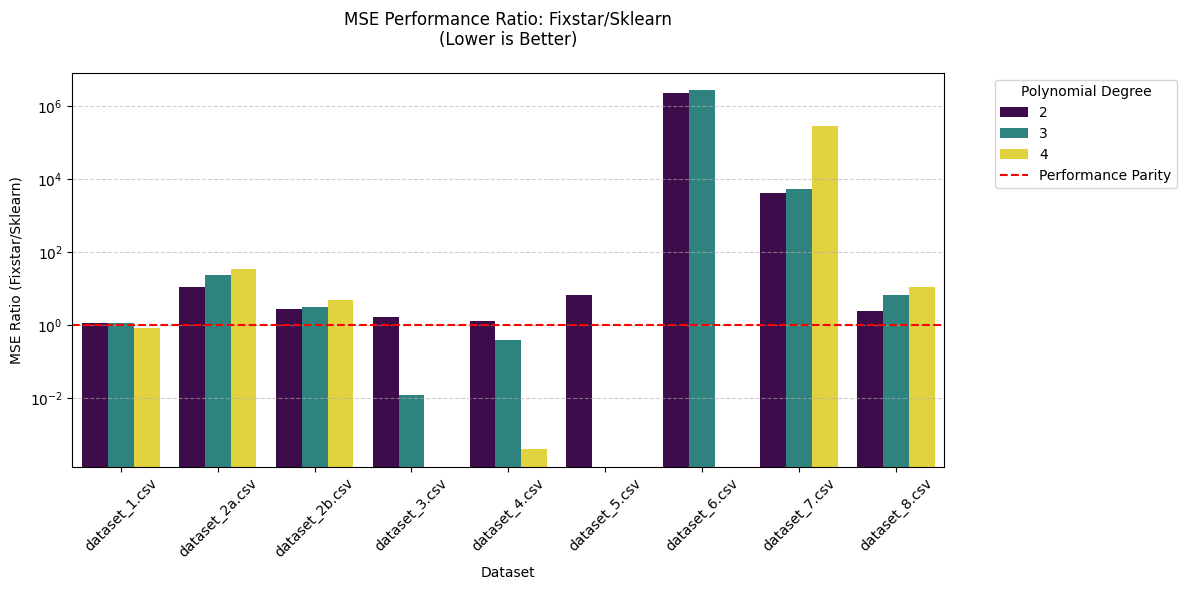

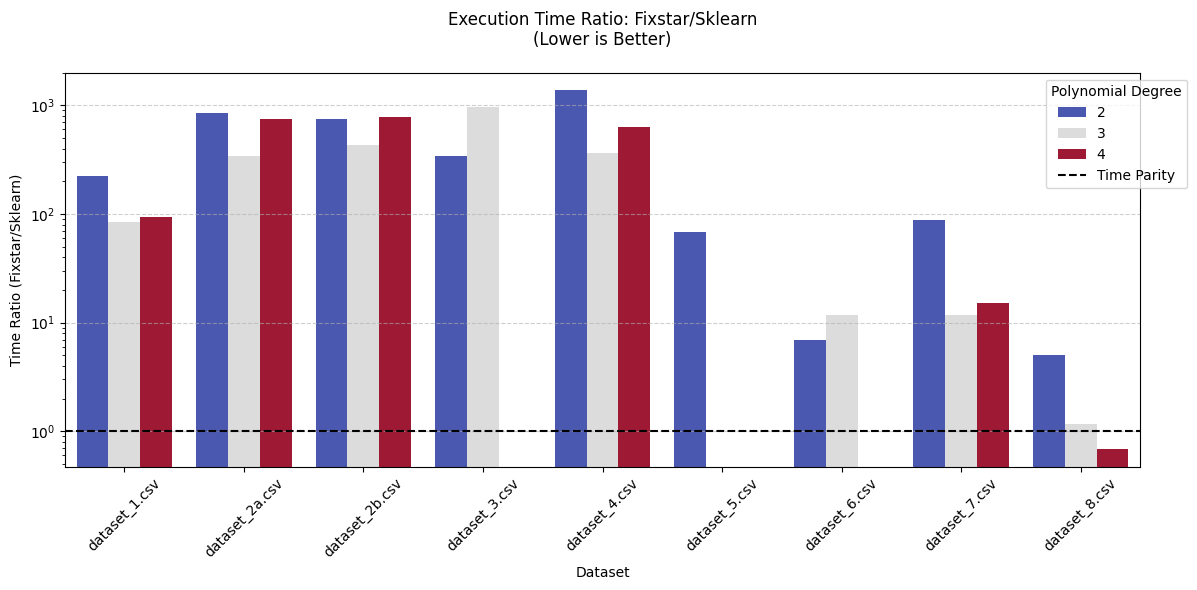

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_differences(df):
    results = []
    
    for dataset in df['Dataset_Name'].unique():
        for degree in df['Degree'].unique():
            # Get both models' results with error handling
            mask = (df['Dataset_Name'] == dataset) & (df['Degree'] == degree)
            fixstar_data = df[mask & (df['Model'] == 'Fixstar')]
            sklearn_data = df[mask & (df['Model'] == 'Sklearn')]
            
            # Skip if either model is missing for this combination
            if len(fixstar_data) == 0 or len(sklearn_data) == 0:
                continue
                
            fixstar = fixstar_data.iloc[0]
            sklearn = sklearn_data.iloc[0]
            
            # Calculate difference metrics
            metrics = {
                'Dataset': dataset,
                'Degree': degree,
                'Rows': fixstar['Number of Row'],
                'Features': fixstar['Number_Of_Features'],
                
                # MSE metrics
                'MSE_Diff': fixstar['MSE'] - sklearn['MSE'],
                'MSE_Ratio': fixstar['MSE'] / sklearn['MSE'],
                'MSE_Pct_Diff': ((fixstar['MSE'] - sklearn['MSE']) / sklearn['MSE']) * 100,
                
                # MAE metrics
                'MAE_Diff': fixstar['MAE'] - sklearn['MAE'],
                'MAE_Ratio': fixstar['MAE'] / sklearn['MAE'],
                
                # R2 metrics
                'R2_Diff': fixstar['R2 Score'] - sklearn['R2 Score'],
                
                # Time metrics
                'Time_Ratio': fixstar['total_time'] / sklearn['total_time'],
                'Time_Diff': fixstar['total_time'] - sklearn['total_time'],
                
                # Baseline values
                'Sklearn_MSE': sklearn['MSE'],
                'Fixstar_MSE': fixstar['MSE']
            }
            results.append(metrics)
    
    return pd.DataFrame(results)

# Calculate differences
diff_df = calculate_differences(df)

# Display key metrics sorted by largest MSE difference
print(diff_df[['Dataset', 'Degree', 'MSE_Ratio', 'MSE_Pct_Diff', 
               'MAE_Ratio', 'R2_Diff', 'Time_Ratio']]
      .sort_values('MSE_Ratio', ascending=False))

# Visualization 1: MSE Ratio Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=diff_df, x='Dataset', y='MSE_Ratio', hue='Degree', palette='viridis')
plt.axhline(1, color='red', linestyle='--', label='Performance Parity')
plt.title('MSE Performance Ratio: Fixstar/Sklearn\n(Lower is Better)', pad=20)
plt.ylabel('MSE Ratio (Fixstar/Sklearn)')
plt.yscale('log')  # Log scale to better show large ratios
plt.legend(title='Polynomial Degree', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualization 2: Time Ratio Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=diff_df, x='Dataset', y='Time_Ratio', hue='Degree', palette='coolwarm')
plt.axhline(1, color='black', linestyle='--', label='Time Parity')
plt.title('Execution Time Ratio: Fixstar/Sklearn\n(Lower is Better)', pad=20)
plt.ylabel('Time Ratio (Fixstar/Sklearn)')
plt.yscale('log')  # Log scale for time differences
plt.legend(title='Polynomial Degree', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [1]:
##Test